# Clustering avec K-Means

## Introduction

TODO: Rédiger l'intro

In [1]:
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.cluster import KMeans

from ipywidgets import IntSlider, HBox, VBox, Button

from bqplot import (
    LogScale, LinearScale, OrdinalColorScale, ColorAxis,
    Axis, Scatter, Lines, CATEGORY10, Label, Figure, Tooltip
)

# Les données

Nous allons considérer que nous avons les données de 32 utilisateurs de trains
Pour ces 32 usagers, nous connaissons:
- Leur degré de satisfaction (une note sur 10)
- La fréquence d'achats de billets de train par mois = la somme de tous les achats pour une année divisée par 12

Nous souhaitons mieux connaître ces clients à partir de ces deux features.
C'est pourquoi nous allons essayer de les segmenter en plusieurs catégories de manière à avoir des groupes de clients qui ont les mêmes caractéristiques et pour lesquels nous allons pouvoir proposer des services ou des communications personnalisés.
Nous allons donc essayer d'extraire des connaissances pour tenter de relever des sous-ensembles de données difficiles à identifier à l’œil nu.

Voici à quoi ressemble nos données:

In [2]:
data = pd.read_csv('3.12. Example.csv')
data.head()

,Satisfaction,Fréquence d’achats par mois
0,4,0.47
1,6,1.52
2,5,0.81
3,7,1.51
4,4,2.86


Ensuite, nous allons simplement afficher nos données dans un espace à 2 dimensions (puisque nous n'avons que 2 features)

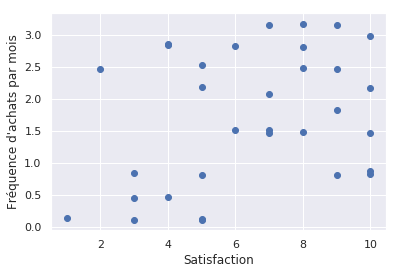

In [3]:
plt.scatter(data['Satisfaction'], data['Fréquence d’achats par mois'])
plt.xlabel('Satisfaction')
plt.ylabel("Fréquence d'achats par mois")
plt.show()

In [4]:
x = data.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

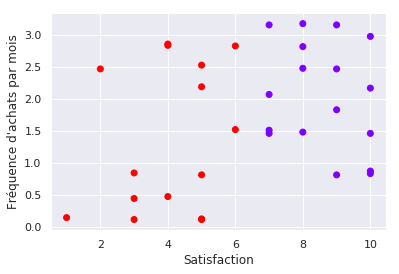

In [7]:
plt.scatter(clusters['Satisfaction'], clusters['Fréquence d’achats par mois'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()

# Normalisation des données

Nous avons l'impression ici que la "Satisfaction" est choisie comme critère de regroupement et que la fréquence d'achats a été négligée. 

Ce résultat peut être considéré biaisé car notre algorithme a négligé le critère "Fréquence d'achats par mois". 

En effet,le critère "Satisfaction" a été choisi comme caractéristique car il avait de grandes valeurs.

C'est pourquoi nous devons mettre les données à l'échelle en les normalisant afin que les deux données aient une pondération égale.
Nous ne pouvons pas négliger la "Fréquence d'achats par mois", car elle joue un rôle important dans les analyses de la segmentation du marché.

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
#x_scaled

/home/sihihi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


Une fois normalisées, voici à quoi ressemble nos données:

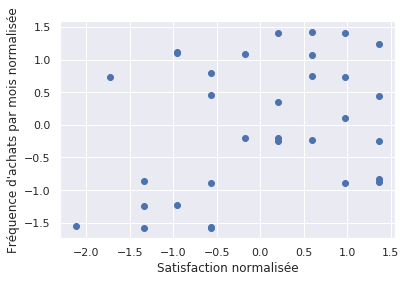

In [37]:
plt.scatter(x_scaled[:,0], x_scaled[:,1])
plt.xlabel('Satisfaction normalisée')
plt.ylabel("Fréquence d'achats par mois normalisée")
plt.show()

******************************************************************************************************************

# DEMO

In [13]:
initial_k = 0

In [15]:
blobs = x_scaled

In [28]:
x_sc = LinearScale(min=int(blobs[:,0].min()-1), max=int(blobs[:,0].max()+1))
y_sc = LinearScale(min=int(blobs[:,1].min()-1), max=int(blobs[:,1].max()+1))
c_sc = OrdinalColorScale(domain=np.arange(10).tolist(), colors=CATEGORY10[:6])

In [18]:
ax_y = Axis(label='y', scale=y_sc, orientation='vertical', side='left', grid_lines='solid')
ax_x = Axis(label='x', scale=x_sc, grid_lines='solid')

In [19]:
scat = Scatter(x=blobs[:,0],
               y=blobs[:,1],
               scales={'x': x_sc, 'y': y_sc, 'color': c_sc}, color=[1])

In [20]:
scat_centroids = Scatter(x=[0], y=[0], scales={"x": x_sc, "y": y_sc}, colors=["black"])

In [21]:
fig = Figure(marks=[scat, scat_centroids], title='K-means', animation_duration=10, axes=[ax_x, ax_y])

In [31]:
k_slider = IntSlider(min=2,
                     max=10,
                     step=1,
                     description='Nombre de clusters',
                     value=initial_k)

In [23]:
def change_k(change):
    kmeans = KMeans(n_clusters=k_slider.value).fit(blobs)
    scat.color=kmeans.labels_
    scat_centroids.x = kmeans.cluster_centers_[:, 0]
    scat_centroids.y = kmeans.cluster_centers_[:, 1]

In [24]:
k_slider.observe(change_k, 'value')

In [25]:
VBox([HBox([k_slider]), fig])

## The elbow method

In [9]:
wcss = []

for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
#wcss

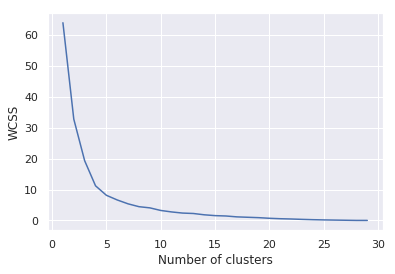

In [10]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new.head()

,Satisfaction,Fréquence d’achats par mois,cluster_pred
0,4,0.47,2
1,6,1.52,0
2,5,0.81,2
3,7,1.51,0
4,4,2.86,3


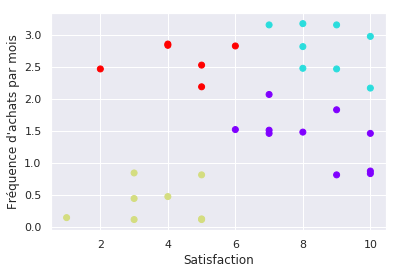

In [12]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Fréquence d’achats par mois'], c = cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()